## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/retail_sale_excel_csv.csv')

### basic information

In [3]:
df.head()

,InvoiceNo,StockCode,Descr_iption,Quantity,UnitPrice,CustomerID,Country,TotalPrice,Invoice_dt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,01-12-2010 08:26
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34,01-12-2010 08:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00,01-12-2010 08:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34,01-12-2010 08:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34,01-12-2010 08:26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103695 entries, 0 to 103694
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     103695 non-null  object 
 1   StockCode     103695 non-null  object 
 2   Descr_iption  103695 non-null  object 
 3   Quantity      103695 non-null  int64  
 4   UnitPrice     103695 non-null  float64
 5   CustomerID    103695 non-null  int64  
 6   Country       103695 non-null  object 
 7   TotalPrice    103695 non-null  float64
 8   Invoice_dt    103695 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 7.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,103695.000000,103695.000000,103695.000000,103695.000000
mean,12.260311,3.433423,15275.661951,21.240466
std,330.495408,19.612983,1735.323360,347.798991
min,-74215.000000,0.000000,12346.000000,-77183.600000
25%,2.000000,1.250000,13815.000000,4.950000
50%,5.000000,1.950000,15150.000000,12.500000
75%,12.000000,3.750000,16841.000000,19.500000
max,74215.000000,2053.070000,18283.000000,77183.600000


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Descr_iption', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'TotalPrice', 'Invoice_dt'],
      dtype='object')

In [7]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Descr_iption,0
Quantity,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0
Invoice_dt,0


In [8]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Descr_iption,object
Quantity,int64
UnitPrice,float64
CustomerID,int64
Country,object
TotalPrice,float64
Invoice_dt,object


In [9]:
# convert date column
df['Invoice_dt'] = pd.to_datetime(df['Invoice_dt'],format='%d-%m-%Y %H:%M')
df['Month'] = df['Invoice_dt'].dt.to_period('M')

/tmp/ipython-input-282738884.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_prod.values,y=df_prod.index,palette='dark')


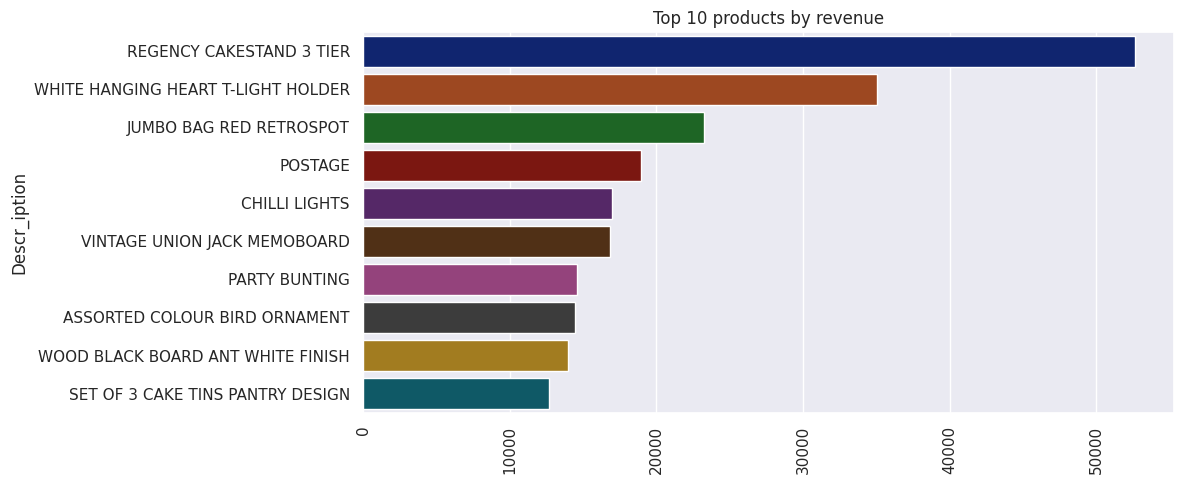

In [10]:
# Top 10 prduct by revenue

df_prod=df.groupby("Descr_iption")["TotalPrice"].sum().sort_values(ascending=False).head(10)
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(x=df_prod.values,y=df_prod.index,palette='dark')
plt.title("Top 10 products by revenue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

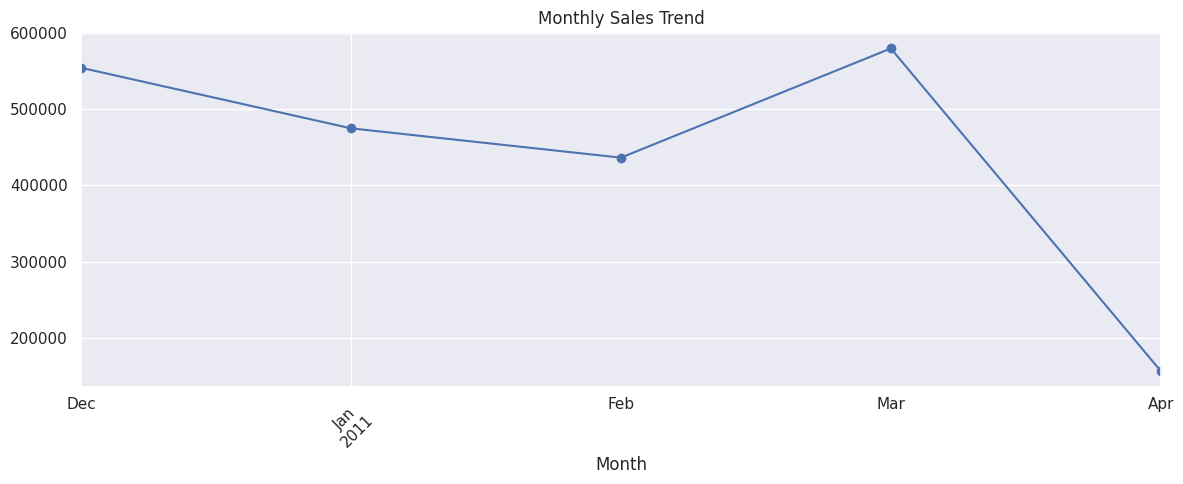

In [11]:
# Monthly Sales Trend
monthly_sale=df.groupby('Month')['TotalPrice'].sum()
monthly_sale.plot(kind="line",marker="o",figsize=(12,5))
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2971766017.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.values, y=country_sales.index, palette="magma")


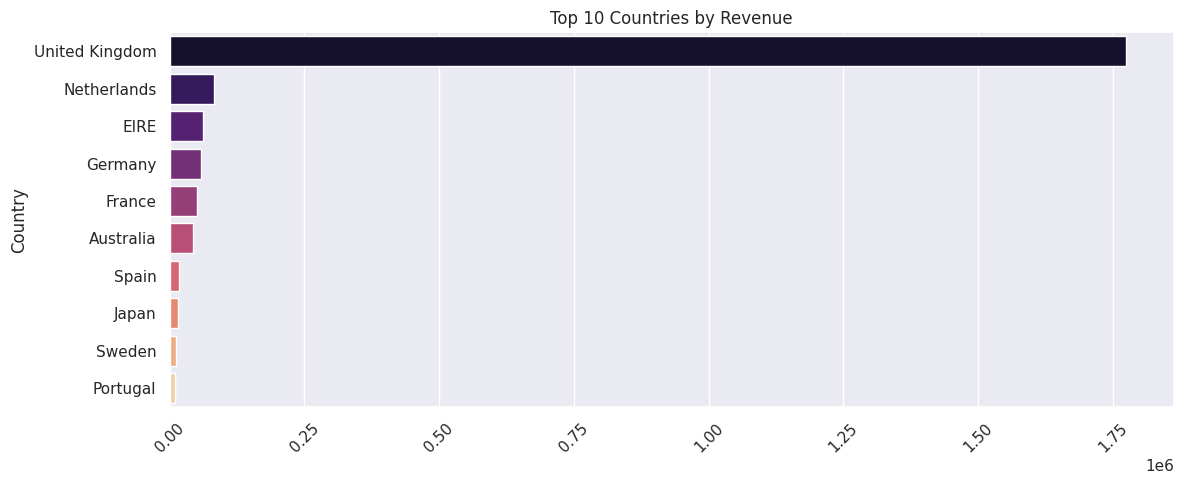

In [12]:
# Sales by Country
country_sales = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(x=country_sales.values, y=country_sales.index, palette="magma")
plt.title("Top 10 Countries by Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-115307069.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="Blues")


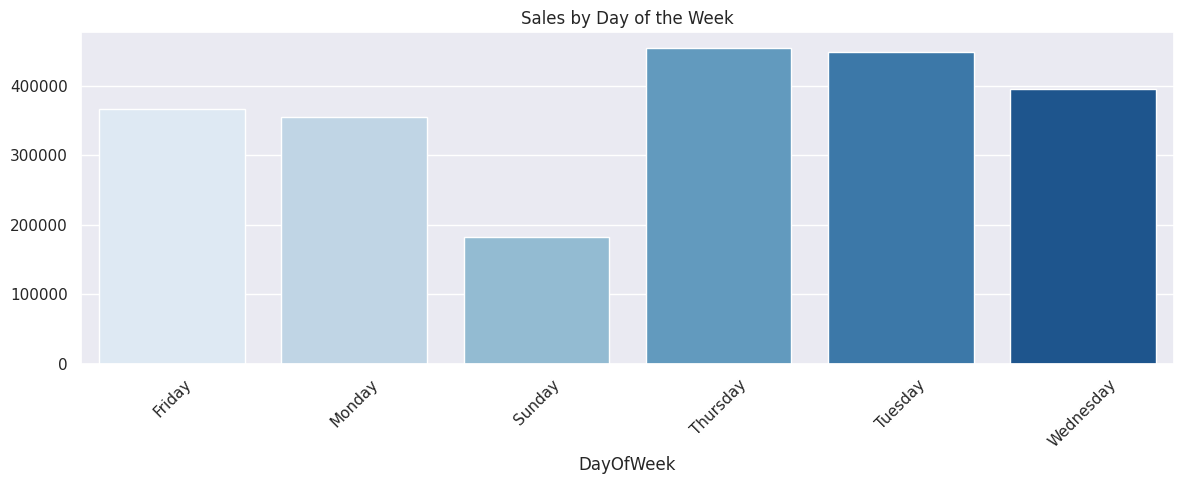

In [13]:
# Sales by Day of Week
df['DayOfWeek']=df['Invoice_dt'].dt.day_name()
weekday_sales = df.groupby("DayOfWeek")["TotalPrice"].sum()

sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="Blues")
plt.title("Sales by Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature Engineering & RFM

In [14]:
# extract feature for invoice_dt
df['year']=df['Invoice_dt'].dt.year
df['month_num']=df['Invoice_dt'].dt.month
df['day']=df['Invoice_dt'].dt.day
df['weekday']=df['Invoice_dt'].dt.weekday

In [15]:

# RFM Analysis

# Reference date = last purchase date + 1 day
ref_date = df["Invoice_dt"].max() + pd.Timedelta(days=1)

# Calculate RFM
customer_df = df.groupby("CustomerID").agg(
    Recency = ("Invoice_dt", lambda x: (ref_date - x.max()).days),
    Frequency = ("InvoiceNo", "nunique"),
    Monetary = ("TotalPrice", "sum")
).reset_index()

print(customer_df.head(10))
print(customer_df.describe())


   CustomerID  Recency  Frequency  Monetary
0       12346       84          2      0.00
1       12347        5          3   1823.43
2       12348        7          3   1487.24
3       12350       69          1    334.40
4       12352       21          8    601.18
5       12356        4          2   2753.08
6       12359       64          2   2386.41
7       12361       46          1    189.90
8       12362       47          2    474.20
9       12363        1          1    299.10
         CustomerID      Recency    Frequency      Monetary
count   2319.000000  2319.000000  2319.000000   2319.000000
mean   15289.463131    49.410522     2.711082    949.775800
std     1722.484856    39.933687     3.827967   2940.216367
min    12346.000000     1.000000     1.000000  -1192.200000
25%    13818.000000    15.000000     1.000000    204.635000
50%    15257.000000    39.000000     2.000000    386.170000
75%    16776.000000    76.000000     3.000000    870.600000
max    18283.000000   132.000000    

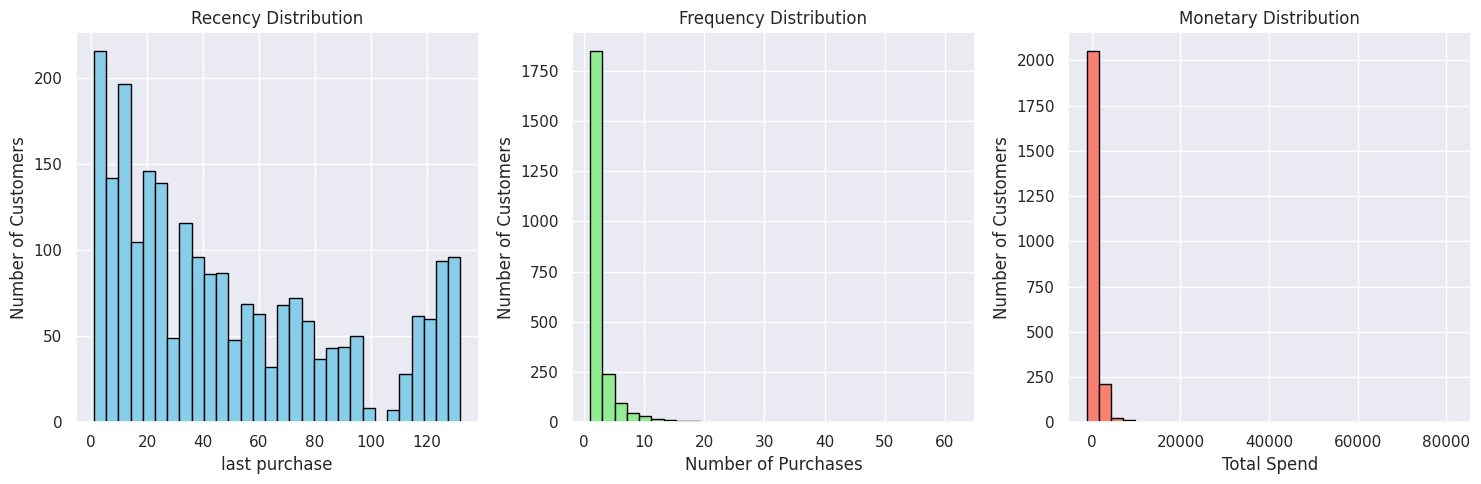

In [16]:


# Set figure size for better visibility
sns.set(rc={'figure.figsize':(15,5)})

# --- Recency ---
plt.subplot(1,3,1)
plt.hist(customer_df["Recency"], bins=30, color="skyblue", edgecolor="black")
plt.title("Recency Distribution")
plt.xlabel("last purchase")
plt.ylabel("Number of Customers")

# --- Frequency ---
plt.subplot(1,3,2)
plt.hist(customer_df["Frequency"], bins=30, color="lightgreen", edgecolor="black")
plt.title("Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")

# --- Monetary ---
plt.subplot(1,3,3)
plt.hist(customer_df["Monetary"], bins=30, color="salmon", edgecolor="black")
plt.title("Monetary Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()


Business Insight:

High-Value Customers (Low Recency, High Frequency, High Monetary) → Send loyalty rewards, exclusive offers, or early access to keep them engaged.

Churn Risk Customers (High Recency, Low Frequency) → Offer discounts or personalized reminders to bring them back.

New Customers → Welcome them with special offers to build long-term relationships.

In [17]:
# Product-Level-product Analysis

product_df = df.groupby("Descr_iption").agg({
    "Quantity":"sum",
    "TotalPrice":"sum",
    "InvoiceNo":"nunique"
}).reset_index()

product_df.rename(columns={
    "Quantity":"TotalSold",
    "TotalPrice":"Revenue",
    "InvoiceNo":"UniqueOrders"
}, inplace=True)


In [18]:
product_df.head(10)

,Descr_iption,TotalSold,Revenue,UniqueOrders
0,10 COLOUR SPACEBOY PEN,1532,1302.20,80
1,12 COLOURED PARTY BALLOONS,429,278.85,28
2,12 DAISY PEGS IN WOOD BOX,222,366.30,37
3,12 EGG HOUSE PAINTED WOOD,46,586.50,26
4,12 IVORY ROSE PEG PLACE SETTINGS,348,435.00,47
5,12 MESSAGE CARDS WITH ENVELOPES,461,724.65,43
6,12 PENCIL SMALL TUBE WOODLAND,1468,909.80,70
7,12 PENCILS SMALL TUBE RED RETROSPOT,2547,1649.55,111
8,12 PENCILS SMALL TUBE SKULL,1897,1227.05,95
9,12 PENCILS TALL TUBE POSY,70,59.50,15


/tmp/ipython-input-1275758581.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Revenue", y="Descr_iption", data=top_products, palette="Blues_r")


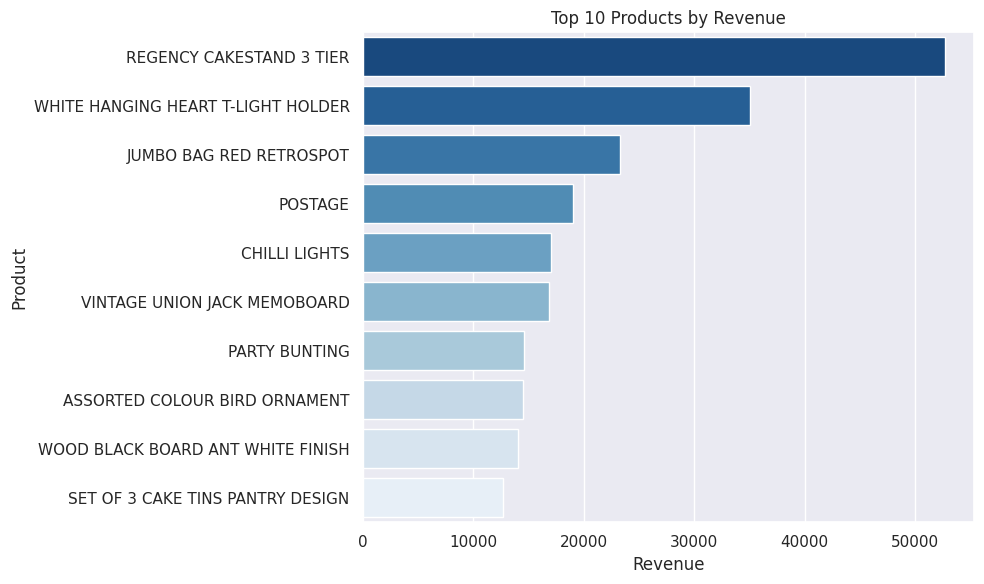

/tmp/ipython-input-1275758581.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalSold", y="Descr_iption", data=top_products, palette="Greens_r")


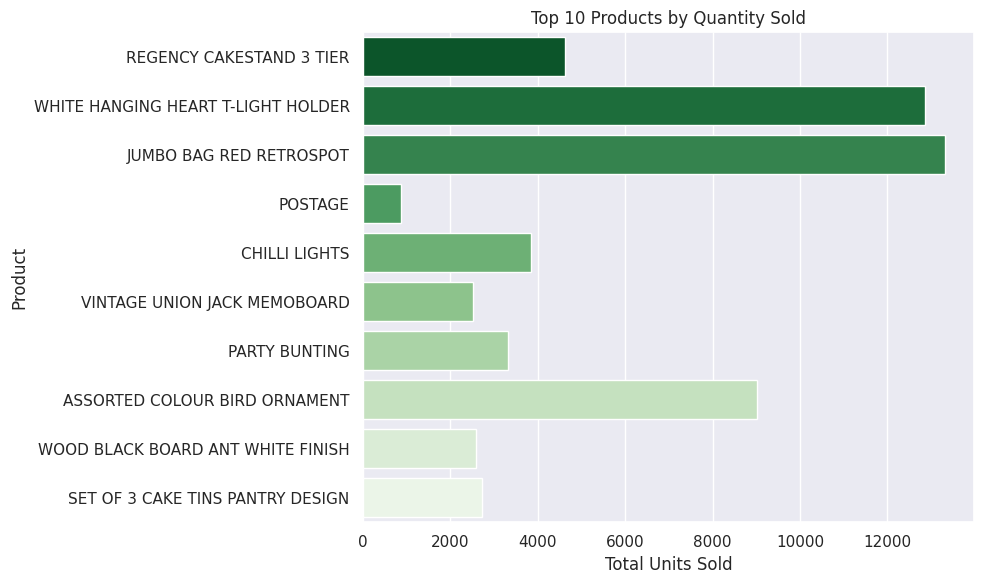

/tmp/ipython-input-1275758581.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="UniqueOrders", y="Descr_iption", data=top_products, palette="Oranges_r")


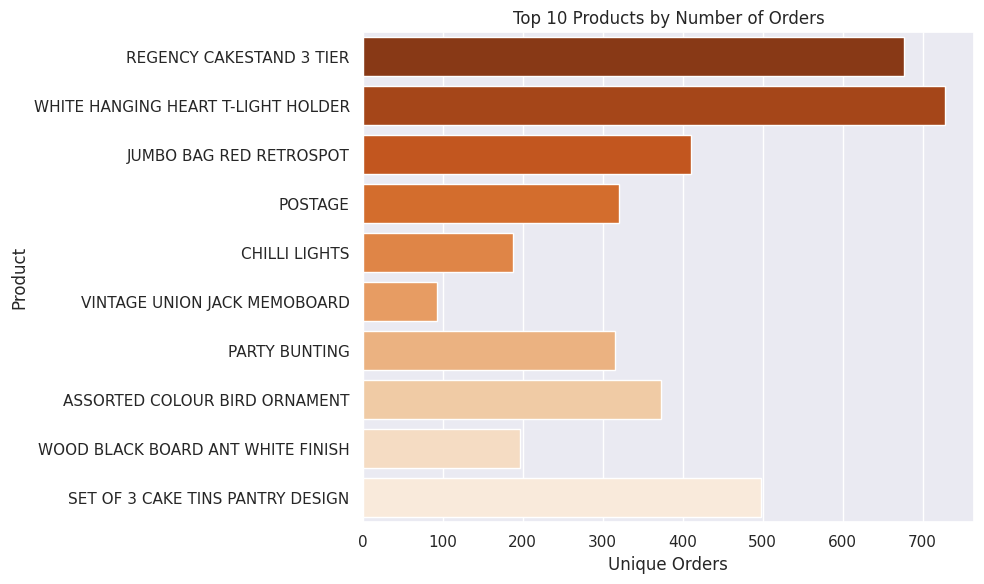

In [19]:
# Top-10 analysis by revenue
top_products=product_df.sort_values(by="Revenue",ascending=False).head(10)

# --- 1. Revenue Bar Chart ---
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x="Revenue", y="Descr_iption", data=top_products, palette="Blues_r")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

# --- 2. Total Quantity Sold ---
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x="TotalSold", y="Descr_iption", data=top_products, palette="Greens_r")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Total Units Sold")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

# --- 3. Unique Orders ---
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x="UniqueOrders", y="Descr_iption", data=top_products, palette="Oranges_r")
plt.title("Top 10 Products by Number of Orders")
plt.xlabel("Unique Orders")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


# Product Level Insights:
Focus on top-selling products → Since these products generate maximum revenue, the business should prioritize their availability, promotions, and bundles to increase sales further.

Improve or replace low-selling products → Products with low sales need to be analyzed for quality, pricing, or customer preference issues. The business can either improve them or reduce focus to save costs.

Cross-sell opportunities → Identify products often bought together and create bundles or discounts to increase overall sales.

# Machine Learning for better prediction

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [23]:
# feature of RFM
x = customer_df[["Recency", "Frequency", "Monetary"]]

In [24]:
# scalling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

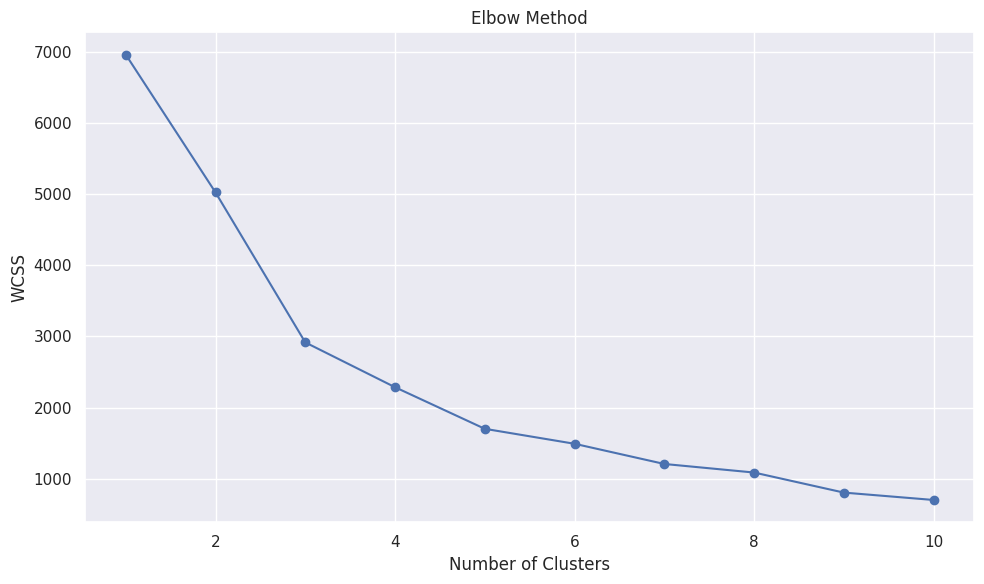

In [25]:
# Elbow Method for optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.tight_layout()
plt.show()

In [26]:
#Final model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
customer_df["Cluster"] = kmeans.fit_predict(X_scaled)

In [27]:
# cluster analysis
cluster_summary = customer_df.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean()
print(cluster_summary)


           Recency  Frequency      Monetary
Cluster                                    
0        24.945803   2.950430    896.487013
1        12.892857  25.428571  19967.562500
2        98.302057   1.428021    368.963342


# Result:
  The K-Means clustering divided customers into three segments: Cluster 1 represents high-value VIP customers with recent, frequent, and high spending behavior. Cluster 0 includes regular but low-spending customers, while Cluster 2 consists of inactive or lost customers with very low engagement and spending. This segmentation helps businesses target loyalty programs, cross-selling, and re-engagement campaigns effectively.